# Lending Club Case Study
### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('loan.csv')

In [3]:
# Displaying the first 5 rows of the dataset
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Checking the shape of the dataset
df.shape

(39717, 111)

In [5]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
# Checking the missing values in the dataset
df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [7]:
#Checking the columns of the dataset
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
# Checking the unique values in the dataset
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [9]:
# Find the columns with all null values
na_columns = df.columns[df.isnull().all()].to_list()
na_columns

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [10]:
# Dropping the columns with all null values
df.drop(na_columns, axis=1, inplace=True)

In [11]:
# Checking the shape of the dataset again after dropping the columns containing all null values
df.shape

(39717, 57)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [13]:
# Checking loan_status column
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [14]:
# Checking the application_type column.. Seesm like it has only one value
df['application_type'].value_counts()

application_type
INDIVIDUAL    39717
Name: count, dtype: int64

In [15]:
df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [16]:
# dropping the columns with more than 50% missing values
df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'],axis=1,inplace=True)
df.shape

(39717, 53)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [18]:
# Checking the missing values in the dataset again
df.isnull().sum().sort_values(ascending=False)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_prncp                  0
out_prncp                        0
initial_list_status              0
out_prncp_inv                    0
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
collection_recovery_fee          0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                  

In [19]:
# Checking the emp_length column
df['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [20]:
# impuation of missing values in emp_length column
df['emp_length'].fillna('Missing', inplace=True)

In [21]:
# Checking the emp_length column after imputation
df['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Missing      1075
Name: count, dtype: int64

In [22]:
# checking the missing values in the dataset again
df.isnull().sum().sort_values(ascending=False)

emp_title                     2459
pub_rec_bankruptcies           697
last_pymnt_d                    71
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_prncp                  0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
collection_recovery_fee          0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                               0
open_acc            

In [23]:
#Checking pub_rec_bankruptcies column
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [24]:
# Imputing the missing values in pub_rec_bankruptcies column
df['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [25]:
# Checking the missing values in the dataset again
df.isnull().sum().sort_values(ascending=False)

emp_title                     2459
last_pymnt_d                    71
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_int                    0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
collection_recovery_fee          0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
pub_rec_bankruptcies             0
revol_bal                        0
id                               0
open_acc            

In [26]:
# Checking the last_credit_pull_d column
df['last_credit_pull_d'].value_counts()

last_credit_pull_d
May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: count, Length: 106, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  39717 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [28]:
df = df[~df['last_credit_pull_d'].isnull()] # Removing the rows with missing values in last_credit_pull_d column
df.shape

(39715, 53)

In [29]:
# Checking the missing values in the dataset again
df.isnull().sum().sort_values(ascending=False)

emp_title                     2457
last_pymnt_d                    71
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
revol_util                      50
tax_liens                       39
title                           11
total_rec_int                    0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
collection_recovery_fee          0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
last_credit_pull_d               0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
pub_rec_bankruptcies             0
revol_bal                        0
id                               0
open_acc            

In [30]:
# imputing the missing values in the emp_title column
df['emp_title'].fillna('Missing', inplace=True)

In [31]:
# Checking the missing values in the dataset again
df.isnull().sum().sort_values(ascending=False)

last_pymnt_d                  71
chargeoff_within_12_mths      56
collections_12_mths_ex_med    56
revol_util                    50
tax_liens                     39
title                         11
total_rec_int                  0
revol_bal                      0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
recoveries                     0
total_rec_late_fee             0
open_acc                       0
collection_recovery_fee        0
last_pymnt_amnt                0
last_credit_pull_d             0
policy_code                    0
application_type               0
acc_now_delinq                 0
delinq_amnt                    0
pub_rec_bankruptcies           0
pub_rec                        0
id                             0
member_id                      0
home_ownership                 0
loan_amnt 

In [32]:
df['last_pymnt_d'].value_counts()

last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: count, Length: 101, dtype: int64

In [33]:
df = df[~df['last_pymnt_d'].isnull()] # Removing the rows with missing values in last_pymnt_d column
df.shape

(39644, 53)

In [34]:
# Checking the missing values in the dataset again
df.isnull().sum().sort_values(ascending=False)

chargeoff_within_12_mths      56
collections_12_mths_ex_med    56
revol_util                    46
tax_liens                     39
title                         11
total_rec_int                  0
revol_bal                      0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
recoveries                     0
total_rec_late_fee             0
open_acc                       0
collection_recovery_fee        0
last_pymnt_d                   0
last_pymnt_amnt                0
last_credit_pull_d             0
policy_code                    0
application_type               0
acc_now_delinq                 0
delinq_amnt                    0
pub_rec_bankruptcies           0
pub_rec                        0
id                             0
member_id                      0
home_ownership                 0
loan_amnt 

In [35]:
df = df[~df['chargeoff_within_12_mths'].isnull()] # Removing the rows with missing values in chargeoff_within_12_mths column

In [36]:
df = df[~df['collections_12_mths_ex_med'].isnull()] # Removing the rows with missing values in collections_12_mths_ex_med column

In [37]:
df = df[~df['revol_util'].isnull()] # Removing the rows with missing values in revol_util column

In [38]:
df = df[~df['tax_liens'].isnull()] # Removing the rows with missing values in tax_liens column

In [39]:
 df = df[~df['title'].isnull()] # Removing the rows with missing values in title column

In [40]:
# Checking the missing values in the dataset again
df.isnull().sum().sort_values(ascending=False)

id                            0
open_acc                      0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_d                  0
last_pymnt_amnt               0
last_credit_pull_d            0
collections_12_mths_ex_med    0
policy_code                   0
application_type              0
acc_now_delinq                0
chargeoff_within_12_mths      0
delinq_amnt                   0
pub_rec_bankruptcies          0
pub_rec                       0
inq_last_6mths                0
member_id                     0
earliest_cr_line              0
loan_amnt                     0
funded_amnt                   0
funded_a

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39531 entries, 0 to 39665
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39531 non-null  int64  
 1   member_id                   39531 non-null  int64  
 2   loan_amnt                   39531 non-null  int64  
 3   funded_amnt                 39531 non-null  int64  
 4   funded_amnt_inv             39531 non-null  float64
 5   term                        39531 non-null  object 
 6   int_rate                    39531 non-null  object 
 7   installment                 39531 non-null  float64
 8   grade                       39531 non-null  object 
 9   sub_grade                   39531 non-null  object 
 10  emp_title                   39531 non-null  object 
 11  emp_length                  39531 non-null  object 
 12  home_ownership              39531 non-null  object 
 13  annual_inc                  39531 no

In [42]:
df.shape

(39531, 53)

In [43]:
# number of records in the dataset after removing the missing values as a percentage of the original dataset
(39531/39717)*100

99.53168668328424

In [44]:
# finding the columns with date values
date_columns = [col for col in df.columns if col.endswith('_d')]
date_columns

['issue_d', 'last_pymnt_d', 'last_credit_pull_d']

In [45]:
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
#change the date columns to datetime format
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%b-%y')
df[date_columns].dtypes

issue_d               datetime64[ns]
earliest_cr_line      datetime64[ns]
last_pymnt_d          datetime64[ns]
last_credit_pull_d    datetime64[ns]
dtype: object

In [46]:
# Checking the data types of the columns
df.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                  object
int_rate                              object
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
url                                   object
purpose                               object
title                                 object
zip_code                              object
addr_state

In [47]:
# checking grade column
df['grade'].value_counts()

grade
B    11986
A    10056
C     8046
D     5271
E     2820
F     1040
G      312
Name: count, dtype: int64

In [48]:
# checking sub_grade column
df['sub_grade'].value_counts()

sub_grade
B3    2914
A4    2881
A5    2736
B5    2697
B4    2499
C1    2127
B2    2052
C2    1994
B1    1824
A3    1806
C3    1520
A2    1496
D2    1342
C4    1228
C5    1177
D3    1166
A1    1137
D4     975
D1     920
D5     868
E1     762
E2     647
E3     547
E4     453
E5     411
F1     327
F2     247
F3     185
F4     164
F5     117
G1     101
G2      77
G4      56
G3      48
G5      30
Name: count, dtype: int64

In [49]:
# checking home_ownership column
df['home_ownership'].value_counts()

home_ownership
RENT        18793
MORTGAGE    17602
OWN          3039
OTHER          96
NONE            1
Name: count, dtype: int64

In [50]:
# checking verification_status column
df['verification_status'].value_counts()

verification_status
Not Verified       16794
Verified           12778
Source Verified     9959
Name: count, dtype: int64

In [51]:
# checking purpose column
df['purpose'].value_counts()

purpose
debt_consolidation    18585
credit_card            5111
other                  3963
home_improvement       2959
major_purchase         2175
small_business         1811
car                    1546
wedding                 939
medical                 691
moving                  579
vacation                378
house                   378
educational             314
renewable_energy        102
Name: count, dtype: int64

In [52]:
# checking title column
df['title'].value_counts()

title
Debt Consolidation                       2180
Debt Consolidation Loan                  1724
Personal Loan                             657
Consolidation                             514
debt consolidation                        505
                                         ... 
auto/motorcycle                             1
Collin                                      1
Kill My Debt                                1
POOL Loan                                   1
Engineer seeks Environmental Training       1
Name: count, Length: 19509, dtype: int64

In [53]:
# checking addr_state column
df['addr_state'].value_counts()

addr_state
CA    7069
NY    3795
FL    2855
TX    2714
NJ    1840
IL    1522
PA    1511
VA    1400
GA    1392
MA    1327
OH    1216
MD    1042
AZ     874
WA     839
CO     787
NC     784
CT     749
MI     719
MO     682
MN     611
NV     496
SC     472
WI     450
AL     450
OR     450
LA     436
KY     324
OK     298
KS     270
UT     258
AR     244
DC     212
RI     198
NM     189
WV     176
HI     173
NH     171
DE     113
MT      85
WY      83
AK      80
SD      63
VT      54
MS      19
TN      17
ID       6
IN       6
IA       5
NE       3
ME       2
Name: count, dtype: int64

In [54]:
# checking initial_list_status column
df['initial_list_status'].value_counts()

initial_list_status
f    39531
Name: count, dtype: int64

In [55]:
# checking application_type column
df['application_type'].value_counts()


application_type
INDIVIDUAL    39531
Name: count, dtype: int64

In [56]:
# checking the loan_status column
df['loan_status'].value_counts()

loan_status
Fully Paid     32856
Charged Off     5535
Current         1140
Name: count, dtype: int64

In [57]:
# checking the emp_length column
df['emp_length'].value_counts()

emp_length
10+ years    8865
< 1 year     4544
2 years      4370
3 years      4080
4 years      3416
5 years      3264
1 year       3214
6 years      2222
7 years      1766
8 years      1472
9 years      1252
Missing      1066
Name: count, dtype: int64

In [58]:
# checking the term column
df['term'].value_counts()

term
36 months    28934
60 months    10597
Name: count, dtype: int64

In [59]:
# checking the int_rate column
df['int_rate'].value_counts()

int_rate
10.99%    956
13.49%    824
11.49%    819
7.51%     786
7.88%     725
         ... 
16.01%      1
10.64%      1
17.34%      1
16.71%      1
15.01%      1
Name: count, Length: 371, dtype: int64

In [60]:
# Checking pymnt_plan column
df['pymnt_plan'].value_counts()

pymnt_plan
n    39531
Name: count, dtype: int64

## Univariate Analysis

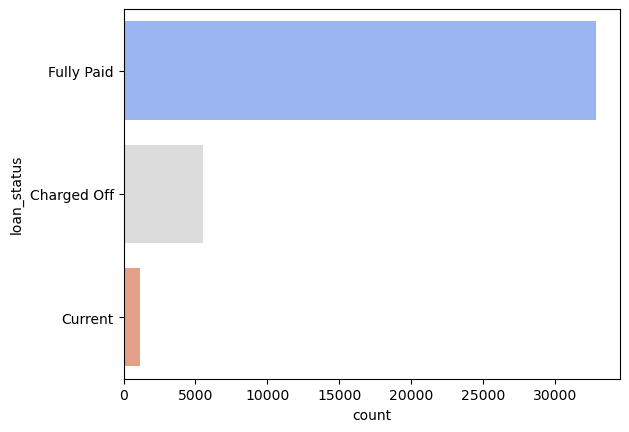

In [61]:
#plotting the count plot for the loan_status column
sns.countplot(df['loan_status'],palette='coolwarm')
plt.show()

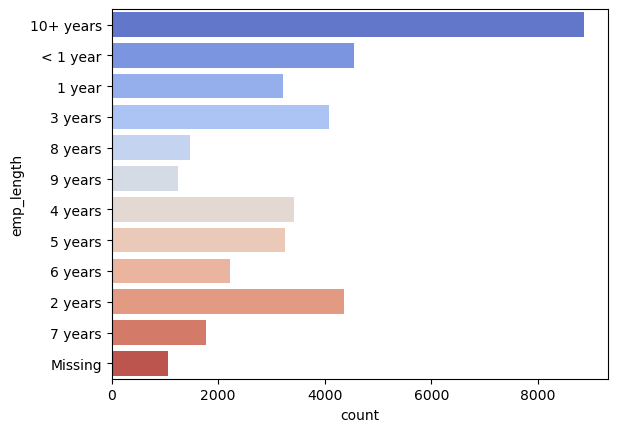

In [62]:
# plotting the count plot for the emp_length column
sns.countplot(df['emp_length'],palette='coolwarm')
plt.show()

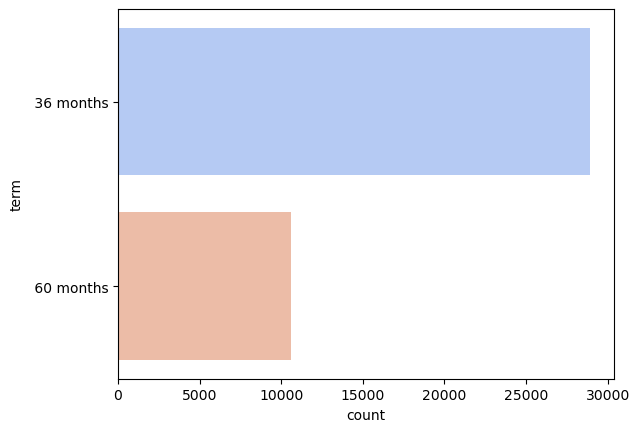

In [63]:
# plotting the count plot for the term column
sns.countplot(df['term'],palette='coolwarm')
plt.show()

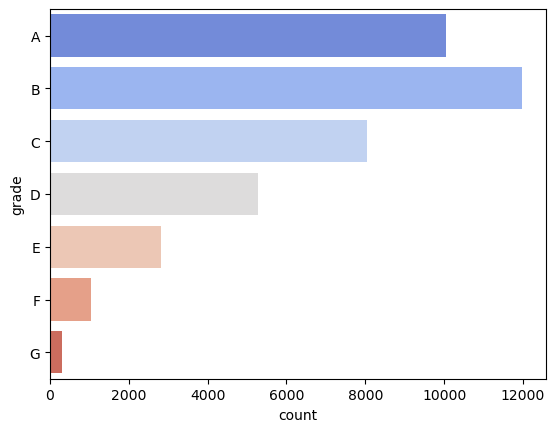

In [64]:
# plotting the count plot for the grade column
sns.countplot(df['grade'], order=sorted(df['grade'].unique()), palette='coolwarm')
plt.show()

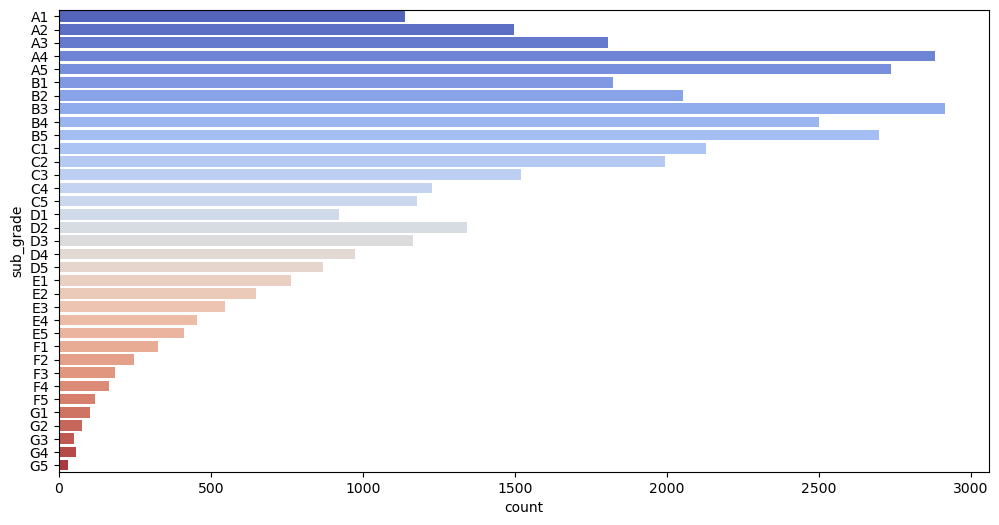

In [65]:
# plotting the count plot for the sub_grade column
plt.figure(figsize=(12,6))
sns.countplot(df['sub_grade'], order=sorted(df['sub_grade'].unique()), palette='coolwarm')
plt.show()

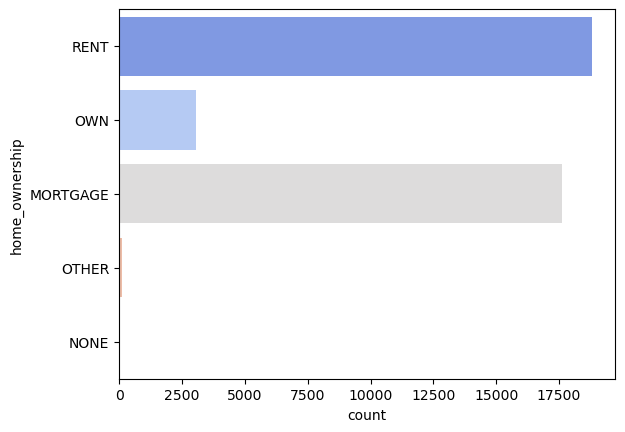

In [66]:
# plotting the count plot for the home_ownership column
sns.countplot(df['home_ownership'], palette='coolwarm')
plt.show()

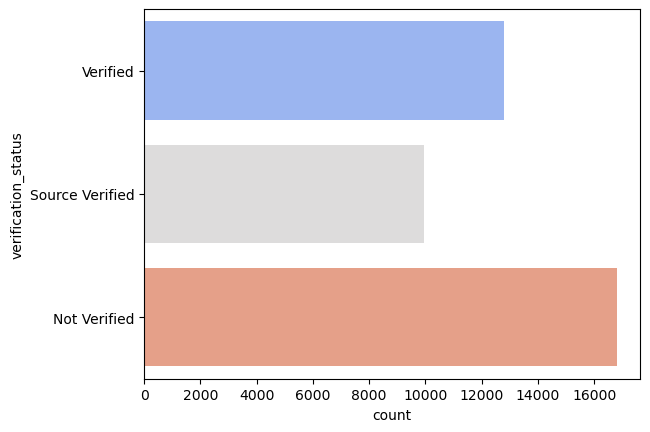

In [67]:
# plotting the count plot for the verification_status column
sns.countplot(df['verification_status'], palette='coolwarm')
plt.show()

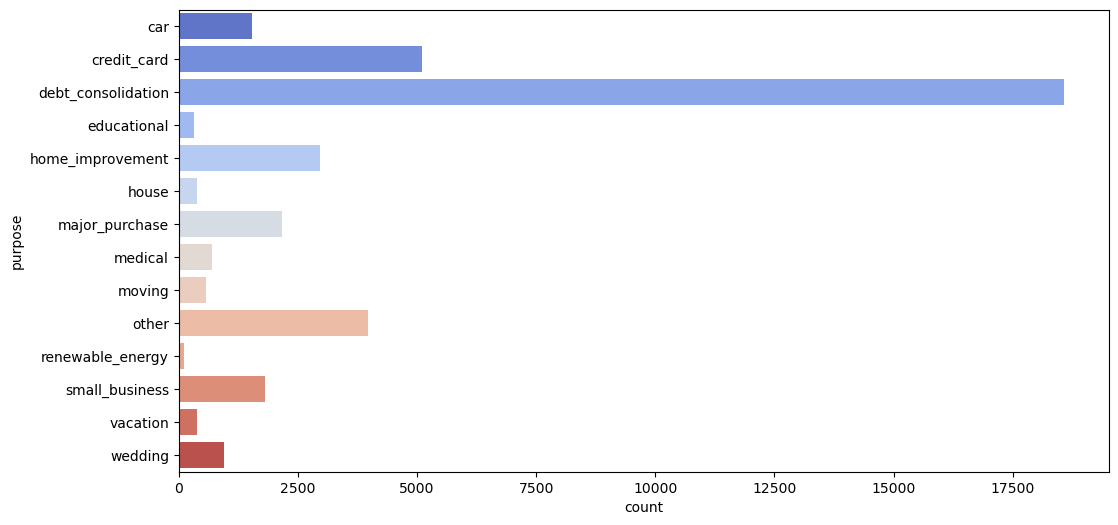

In [68]:
# plotting the count plot for the purpose column
plt.figure(figsize=(12,6))
sns.countplot(df['purpose'], order=sorted(df['purpose'].unique()), palette='coolwarm')
plt.show()

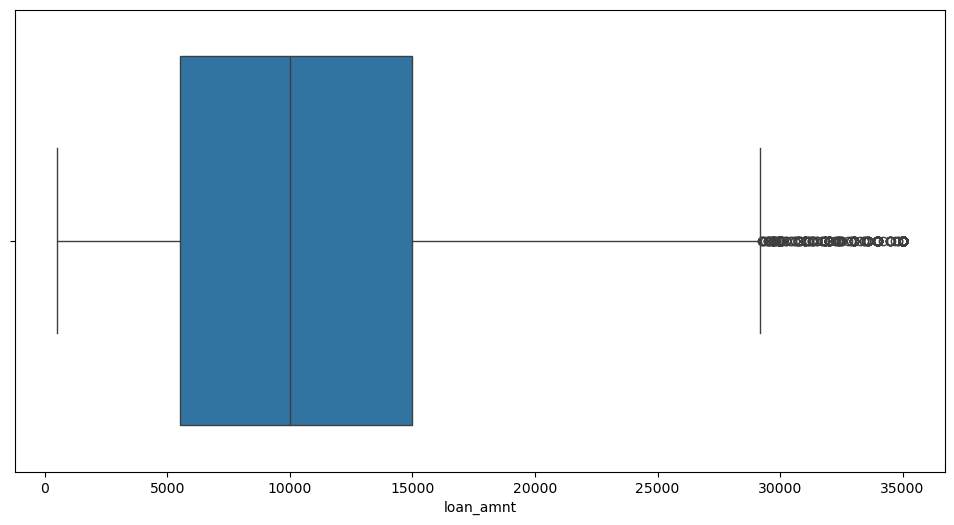

In [69]:
# plotting the box plot of loan_amnt column
plt.figure(figsize=(12,6))
sns.boxplot(x='loan_amnt', data=df)
plt.show()

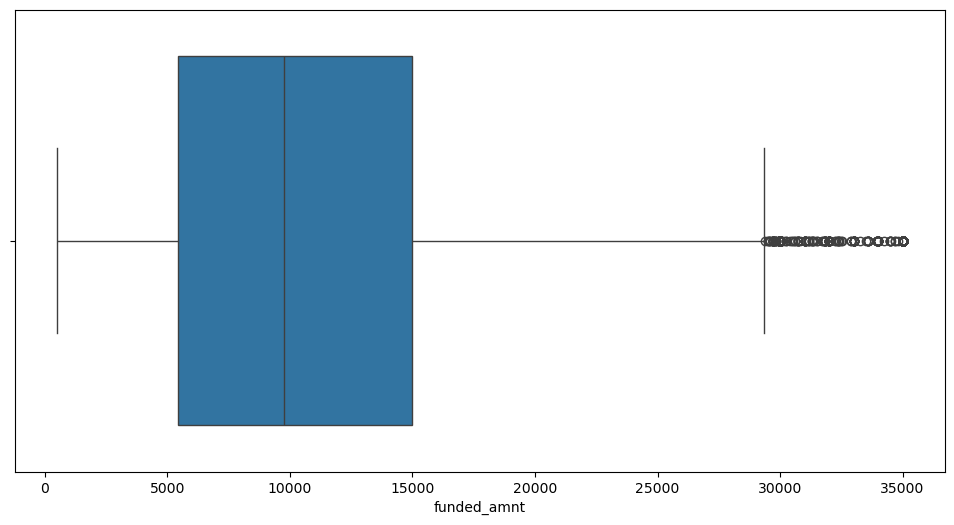

In [70]:
# plotting the box plot of funded_amnt column
plt.figure(figsize=(12,6))
sns.boxplot(x='funded_amnt', data=df)
plt.show()

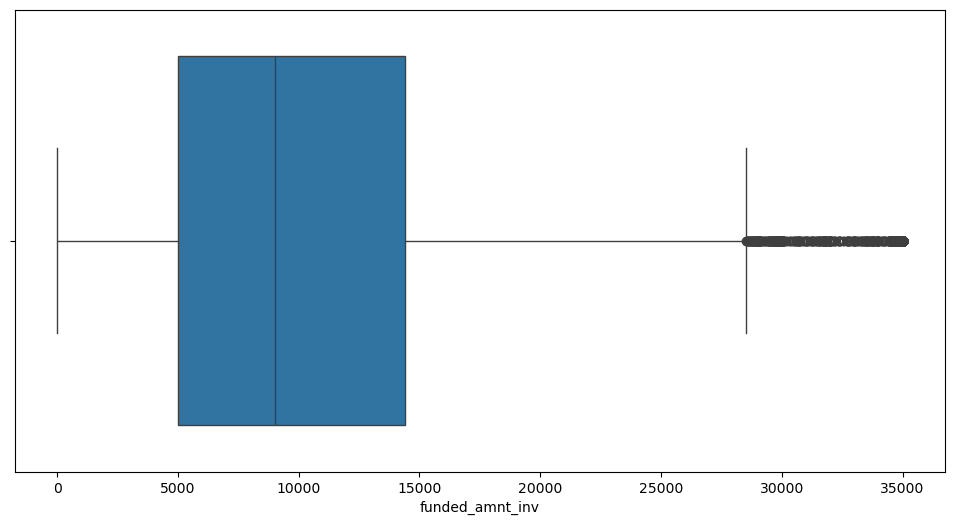

In [71]:
# plotting the box plot of funded_amnt column
plt.figure(figsize=(12,6))
sns.boxplot(x='funded_amnt_inv', data=df)
plt.show()

The loan_amnt, funded_amnt looks similar, so there is no use of comparing them to each other.

In [72]:
# converting the int_rate column to float due to the presence of % sign
df.int_rate = df.int_rate.str.replace('%','').astype(float)

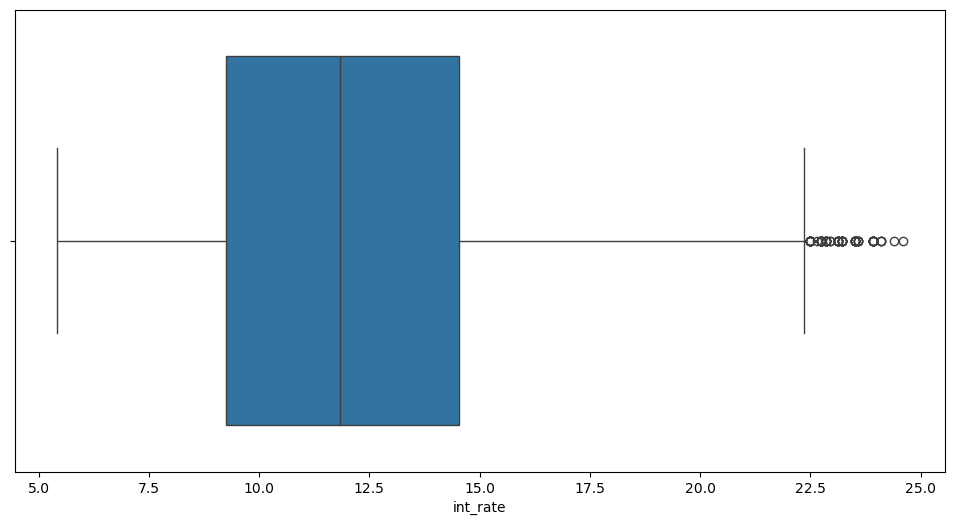

In [73]:
# plotting the box plot of int_rate column
plt.figure(figsize=(12,6))
sns.boxplot(x='int_rate', data=df)
plt.show()

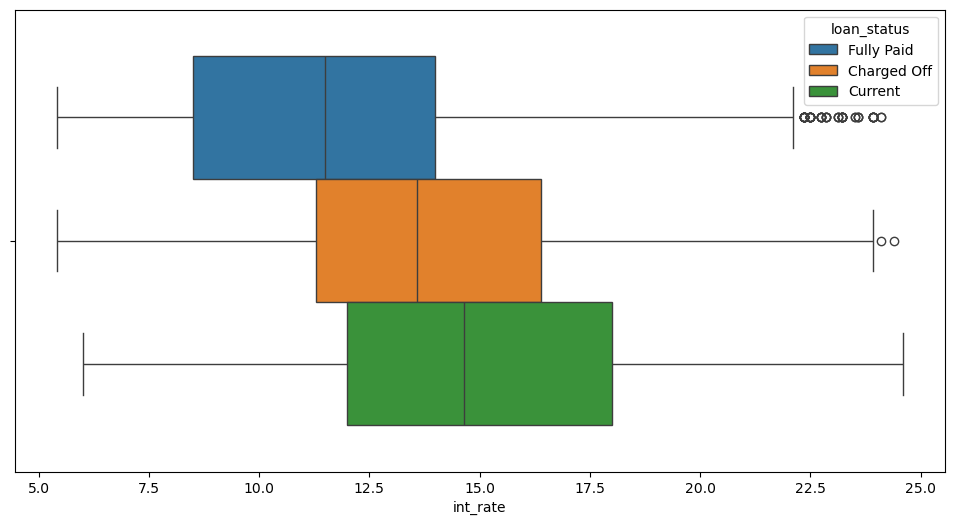

In [74]:
# plotting the box plot of int_rate column
plt.figure(figsize=(12,6))
sns.boxplot(x='int_rate', data=df,hue='loan_status')
plt.show()

The charged off loans seems to have higher median interest rate than fully paid loans and close to 75th percentile of fully paid loans.

In [75]:
# describing the int_rate column grouped by loan_status
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5535.0,13.815523,3.661069,5.42,11.28,13.57,16.40,24.40
Current,1140.0,15.031465,3.600343,6.00,11.99,14.65,17.99,24.59
Fully Paid,32856.0,11.608851,3.599832,5.42,8.49,11.49,13.99,24.11


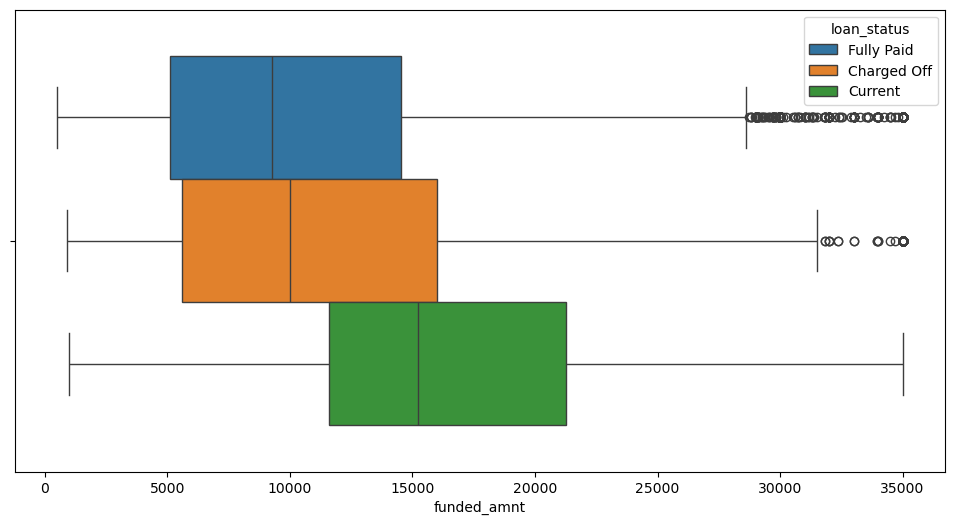

In [76]:
# plotting the box plot of int_rate column with respect to loan_status
plt.figure(figsize=(12,6))
sns.boxplot(x='funded_amnt', data=df,hue='loan_status')
plt.show()

Funded amount does not show much difference

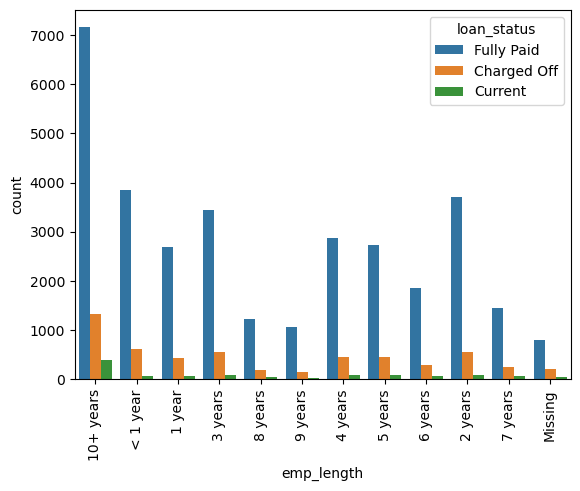

In [77]:
# plotting the count plot for the emp_length column
sns.countplot(x=df['emp_length'],data=df,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

Higher the employment length, higher the chances of getting the loan payed back. But it is also true in case of defaulters.

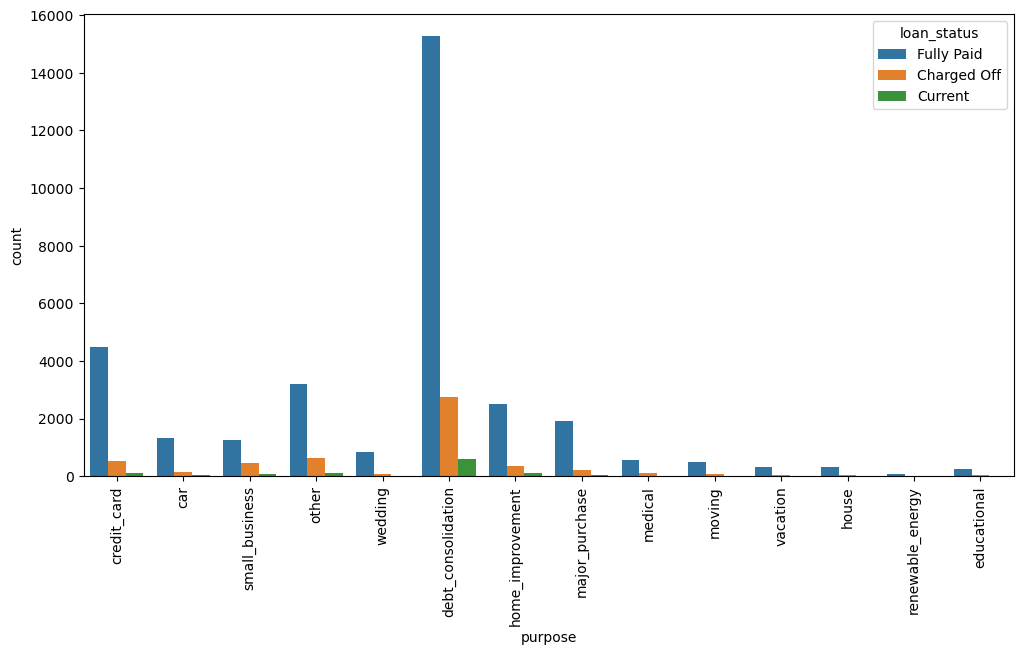

In [78]:
# plotting the count plot for the purpose column with respect to loan_status
plt.figure(figsize=(12,6))
sns.countplot(x=df['purpose'], data=df,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

Debt consolidation shows high probability of paying off the loan, but at the same time, high probability of default also.

<Axes: xlabel='verification_status', ylabel='count'>

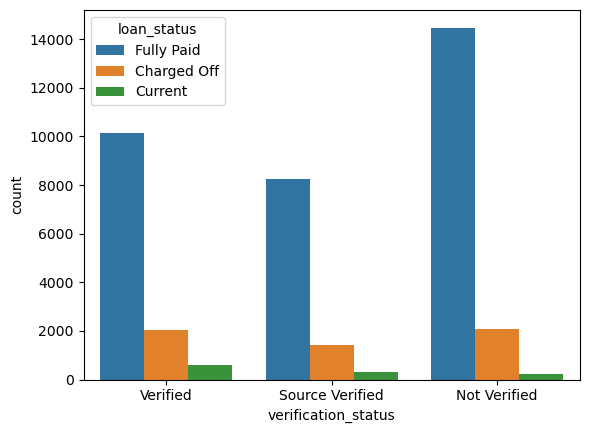

In [79]:
# plotting the count plot for the verification_status column with respect to loan_status
sns.countplot(x=df['verification_status'], data=df,hue='loan_status')

In [80]:
#checking the tax_liens column
df['tax_liens'].value_counts()

tax_liens
0.0    39531
Name: count, dtype: int64

In [81]:
#checking the pub_rec_bankruptcies column
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37859
1.0     1665
2.0        7
Name: count, dtype: int64

In [82]:
#checking the collections_12_mths_ex_med column
df['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0.0    39531
Name: count, dtype: int64

In [83]:
#checking the chargeoff_within_12_mths column
df['chargeoff_within_12_mths'].value_counts()

chargeoff_within_12_mths
0.0    39531
Name: count, dtype: int64

In [84]:
#checking the revol_util column
df['revol_util'].value_counts()

revol_util
0%        973
63%        62
0.20%      62
0.10%      58
40.70%     58
         ... 
25.74%      1
0.83%       1
47.36%      1
24.65%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [85]:
#checking the dti column
df['dti'].value_counts()

dti
0.00     174
12.00     51
18.00     45
19.20     40
13.20     39
        ... 
29.13      1
25.31      1
29.76      1
28.42      1
25.43      1
Name: count, Length: 2868, dtype: int64

In [86]:
# checking inq_last_6mths column
inq_6mths_count = df['inq_last_6mths'].value_counts()

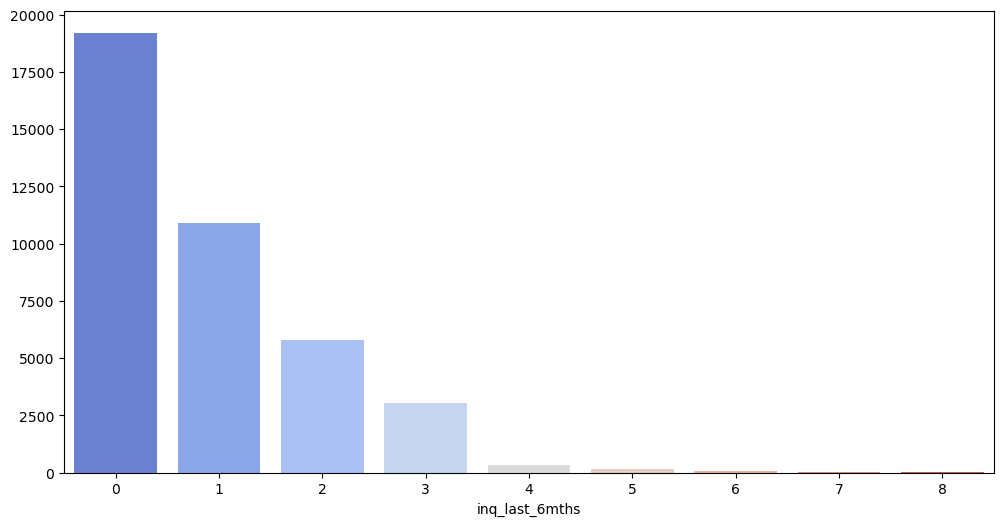

In [88]:
# plotting the bar plot for inq_6mths_count column
plt.figure(figsize=(12,6))
sns.barplot(x=inq_6mths_count.index, y=inq_6mths_count.values, palette='coolwarm')
plt.show()

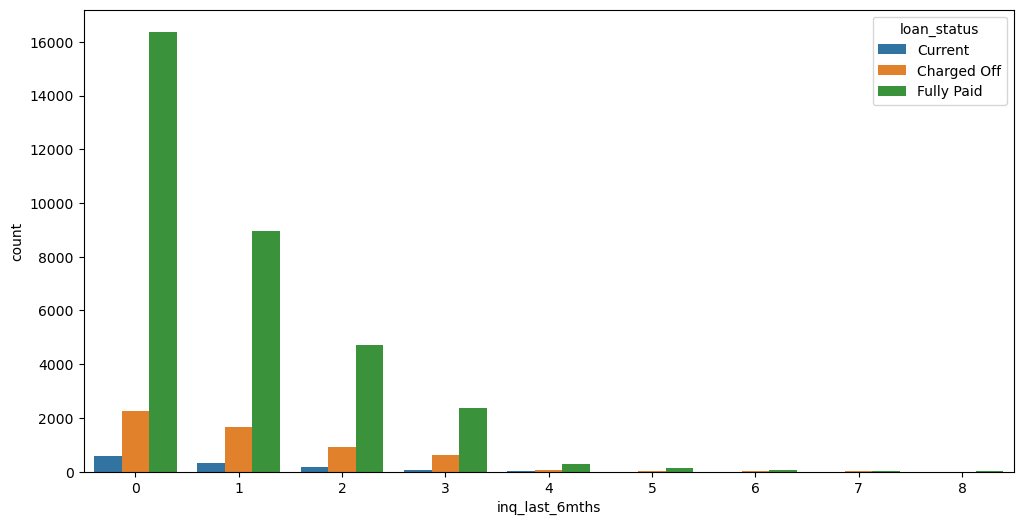

In [90]:
# plotting the count plot for inq_last_6mths column vs loan_status
plt.figure(figsize=(12,6))
sns.countplot(x=df['inq_last_6mths'], data=df,hue='loan_status')
plt.show()


In [92]:
# checking chargeoff_within_12_mths column
chargeoff_12mths_count = df['chargeoff_within_12_mths'].value_counts()
chargeoff_12mths_count

chargeoff_within_12_mths
0.0    39531
Name: count, dtype: int64

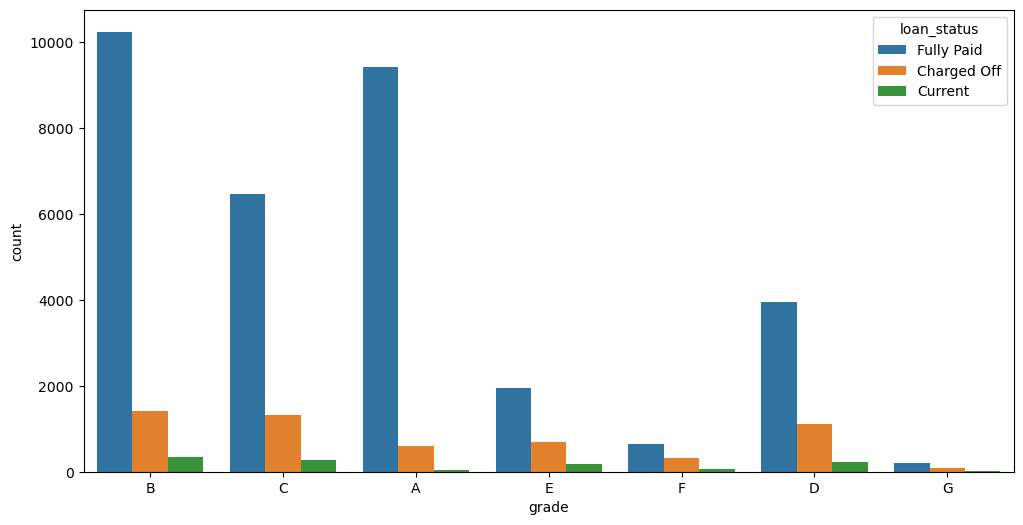

In [93]:
# plotting the bar plot for grade column vs loan_status
plt.figure(figsize=(12,6))
sns.countplot(x=df['grade'], data=df,hue='loan_status')
plt.show()

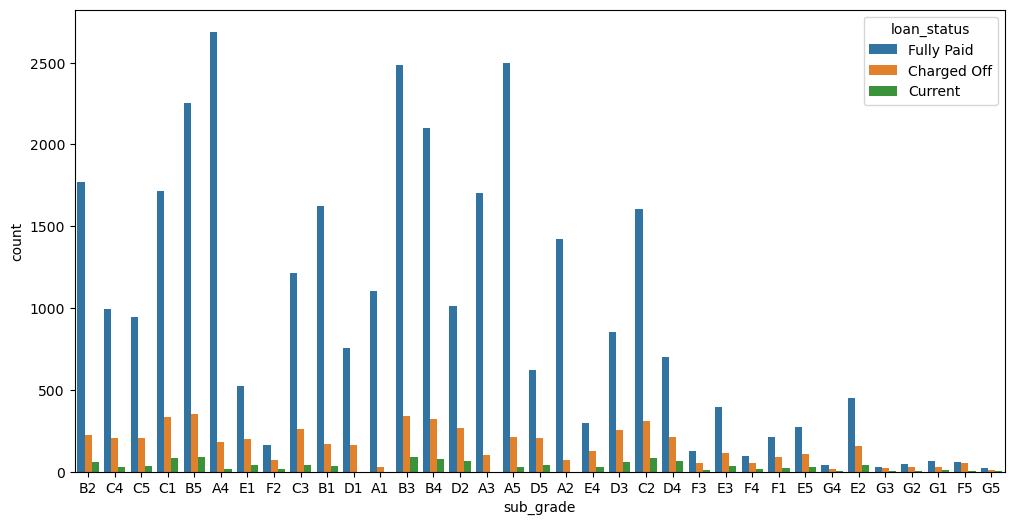

In [94]:
# plotting the bar plot for sub_grade column vs loan_status
plt.figure(figsize=(12,6))
sns.countplot(x=df['sub_grade'], data=df,hue='loan_status')
plt.show()

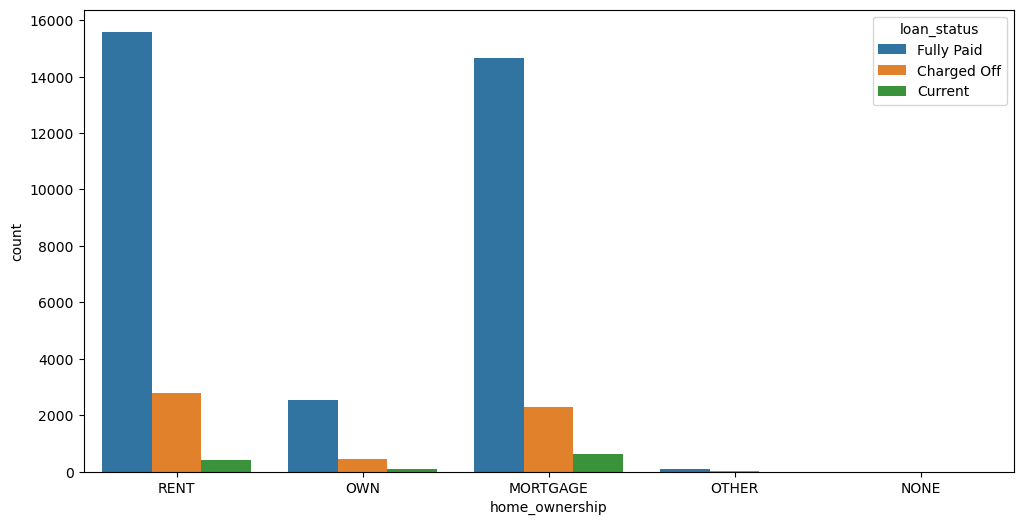

In [95]:
# plotting the bar plot for home_ownership column vs loan_status
plt.figure(figsize=(12,6))
sns.countplot(x=df['home_ownership'], data=df,hue='loan_status')
plt.show()